In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Received payment data

In [3]:
Rec_Pay_data = pd.read_csv("Received_Payments_Data.csv")
Rec_Pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [4]:
Rec_Pay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [5]:
Rec_Pay_data.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [6]:
Rec_Pay_data.shape

(93937, 16)

In [7]:
#number of unique values n each column
Rec_Pay_data.nunique()

RECEIPT_METHOD               8
CUSTOMER_NAME              690
CUSTOMER_NUMBER           1054
RECEIPT_DOC_NO              73
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
Local Amount              7752
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

In [8]:
Rec_Pay_data.isnull().sum()

RECEIPT_METHOD            0
CUSTOMER_NAME             0
CUSTOMER_NUMBER           0
RECEIPT_DOC_NO           29
RECEIPT_DATE              0
CLASS                     0
CURRENCY_CODE             0
Local Amount              0
USD Amount                0
INVOICE_ALLOCATED         0
INVOICE_CREATION_DATE     0
DUE_DATE                  0
PAYMENT_TERM              0
INVOICE_CLASS             0
INVOICE_CURRENCY_CODE     0
INVOICE_TYPE              0
dtype: int64

In [9]:
## RECEIPT_DOC_NO have null values,dropping RECEIPT_DOC_NO column as it is not important for model building.
Rec_Pay_data.drop('RECEIPT_DOC_NO', axis=1, inplace=True)
Rec_Pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [10]:
## changing the data type of columns which a=have date
Rec_Pay_data['RECEIPT_DATE']=pd.to_datetime(Rec_Pay_data['RECEIPT_DATE'])
Rec_Pay_data['INVOICE_CREATION_DATE']=pd.to_datetime(Rec_Pay_data['INVOICE_CREATION_DATE'])
Rec_Pay_data['DUE_DATE']=pd.to_datetime(Rec_Pay_data['DUE_DATE'])

In [11]:
Rec_Pay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CLASS                  93937 non-null  object        
 5   CURRENCY_CODE          93937 non-null  object        
 6   Local Amount           93937 non-null  float64       
 7   USD Amount             93937 non-null  float64       
 8   INVOICE_ALLOCATED      93937 non-null  object        
 9   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 10  DUE_DATE               93937 non-null  datetime64[ns]
 11  PAYMENT_TERM           93937 non-null  object        
 12  INVOICE_CLASS          93937 non-null  object        
 13  I

In [12]:
## Ceating the target column based on late bill payment.using boolean values
Rec_Pay_data['Default'] = (Rec_Pay_data['RECEIPT_DATE']>Rec_Pay_data['DUE_DATE']).astype(int)

In [13]:
Rec_Pay_data.Default.value_counts()

1    61978
0    31959
Name: Default, dtype: int64

In [14]:
#in percentage
Rec_Pay_data.Default.value_counts(normalize=True)

1    0.659783
0    0.340217
Name: Default, dtype: float64

## EDA

In [15]:
# deviding columns in categorical and numerical

In [16]:
#categorical columns
cat_colmn = ['CUSTOMER_NAME','CLASS','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS','INVOICE_CURRENCY_CODE', 'INVOICE_TYPE',
           'RECEIPT_METHOD']


In [17]:
#numerical columns
num_colmn = ['Local Amount', 'USD Amount']

#### categorical columns

In [18]:
## Customer_Name
Rec_Pay_data['CUSTOMER_NAME'].nunique()

690

In [19]:
# top 10 invoice count base customers
Rec_Pay_data['CUSTOMER_NAME'].value_counts().head(10)

SEPH Corp    23143
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
DEBE Corp     2133
RADW Corp     1647
YOUG Corp     1480
HABC Corp     1402
CARR Corp      952
Name: CUSTOMER_NAME, dtype: int64

In [20]:
#top 10 invoice amount(USD) based customers
Rec_Pay_data.groupby('CUSTOMER_NAME').sum()['USD Amount'].sort_values(ascending=False).head(10)

CUSTOMER_NAME
SEPH Corp    3.253371e+10
FARO Corp    5.790071e+09
PARF Corp    3.200510e+09
ALLI Corp    2.580741e+09
AREE Corp    1.125144e+09
HABC Corp    5.343216e+08
RADW Corp    3.622376e+08
L OR Corp    2.955509e+08
CGR  Corp    2.795162e+08
PCD  Corp    2.466070e+08
Name: USD Amount, dtype: float64

In [21]:
## Class 
Rec_Pay_data['CLASS'].nunique()

1

In [22]:
# as class column have one unique value, dropping the CLASS column
Rec_Pay_data.drop('CLASS',axis=1, inplace=True)

In [23]:
Rec_Pay_data.shape

(93937, 15)

In [24]:
## Currency_Code
Rec_Pay_data['CURRENCY_CODE'].nunique()

8

In [25]:
Rec_Pay_data['CURRENCY_CODE'].value_counts()

SAR    36495
AED    36279
USD    19524
EUR     1438
GBP      130
BHD       59
KWD       10
QAR        2
Name: CURRENCY_CODE, dtype: int64

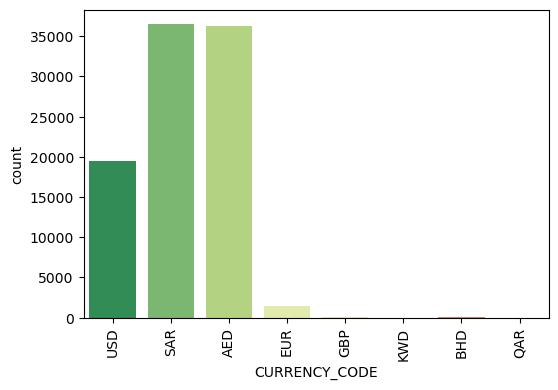

In [26]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=Rec_Pay_data, x='CURRENCY_CODE', palette='RdYlGn_r')
plt.xticks(rotation= 90)
plt.show()

#### AED, SAR, USD are the currencies mostly used for bill payments

In [27]:
## PAYMENT_TERM
Rec_Pay_data['PAYMENT_TERM'].nunique()

42

In [28]:
Rec_Pay_data['PAYMENT_TERM'].value_counts()

60 Days from Inv Date                                      19870
30 Days from Inv Date                                      14672
60 Days from EOM                                           12518
30 Days from EOM                                           11306
15 Days from EOM                                            7544
Immediate Payment                                           5474
Immediate                                                   5261
90 Days from EOM                                            3893
45 Days from Inv Date                                       3550
45 Days from EOM                                            3509
90 Days from Inv Date                                       2211
100% Adv Payment                                            1241
25 DAYS FROM EOM                                             462
Cash on Delivery                                             418
15 Days from Inv Date                                        356
45 DAYS + EOM            

In [29]:
## INVOICE_CLASS
Rec_Pay_data['INVOICE_CLASS'].nunique()

3

In [30]:
Rec_Pay_data['INVOICE_CLASS'].value_counts()

INV    88124
CM      5261
DM       552
Name: INVOICE_CLASS, dtype: int64

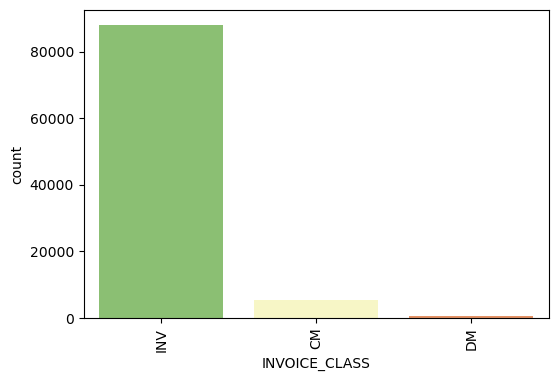

In [31]:
plt.figure(figsize = (6,4))
ax = sns.countplot(data = Rec_Pay_data, x= 'INVOICE_CLASS', palette = 'RdYlGn_r')
plt.xticks(rotation=90)
plt.show()

#### INV has the maximum number of bills in incoice class

In [32]:
## INVOICE_CURRENCY_CODE
Rec_Pay_data['INVOICE_CURRENCY_CODE'].nunique()

10

In [33]:
Rec_Pay_data['INVOICE_CURRENCY_CODE'].value_counts()

SAR    39199
AED    32377
USD    18547
EUR     1519
KWD     1089
QAR      611
BHD      400
GBP      134
JOD       38
ZAR       23
Name: INVOICE_CURRENCY_CODE, dtype: int64

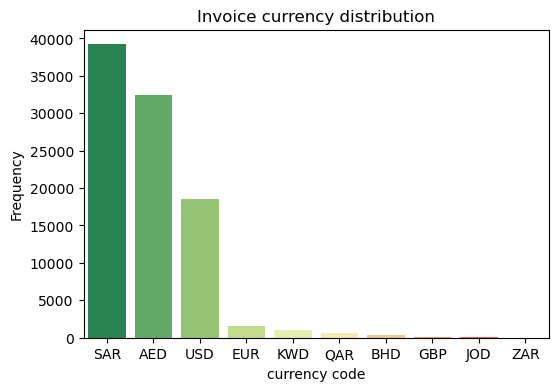

In [34]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data = Rec_Pay_data, x='INVOICE_CURRENCY_CODE', order = Rec_Pay_data['INVOICE_CURRENCY_CODE'].value_counts().index, palette = 'RdYlGn_r')
plt.title("Invoice currency distribution")
plt.xlabel("currency code")
plt.ylabel("Frequency")
plt.show()

#### most of invoices were generated in SAR, AED, UDS currency.

In [35]:
# INVOICE_TYPE
Rec_Pay_data['INVOICE_TYPE'].nunique()

2

In [36]:
Rec_Pay_data['INVOICE_TYPE'].value_counts()

Goods        66715
Non Goods    27222
Name: INVOICE_TYPE, dtype: int64

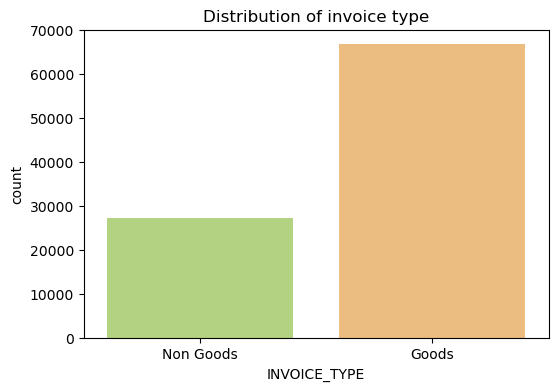

In [37]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=Rec_Pay_data, x='INVOICE_TYPE', palette='RdYlGn_r')
plt.title("Distribution of invoice type")
plt.show()

#### Max generated invoices were for goods product.

In [38]:
## RECEIPT_METHOD
Rec_Pay_data['RECEIPT_METHOD'].nunique()

8

In [39]:
Rec_Pay_data['RECEIPT_METHOD'].value_counts()

WIRE             84407
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: RECEIPT_METHOD, dtype: int64

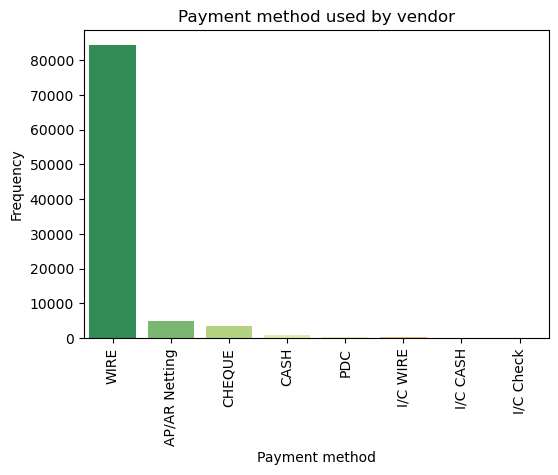

In [40]:
plt.figure(figsize=(6,4))
ax = sns.countplot(data=Rec_Pay_data, x = 'RECEIPT_METHOD', palette='RdYlGn_r')
plt.title("Payment method used by vendor")
plt.xticks(rotation=90)
plt.xlabel("Payment method")
plt.ylabel("Frequency")
plt.show()

#### WIRE was mmostly preffered method by vendor

### Data Imbalance check

In [41]:
Rec_Pay_data["Default"].value_counts(normalize=True)

1    0.659783
0    0.340217
Name: Default, dtype: float64

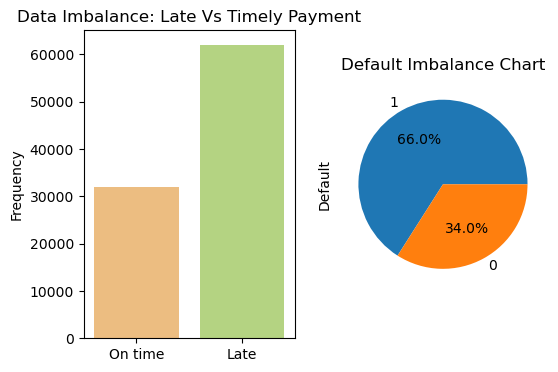

In [42]:
plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
sns.countplot(x='Default', data=Rec_Pay_data, palette='RdYlGn')

plt.title("Data Imbalance: Late Vs Timely Payment")
plt.xlabel("")
plt.ylabel("Frequency")
plt.xticks((0,1),('On time','Late'))

plt.subplot(1,2,2)
(Rec_Pay_data.Default.value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Default Imbalance Chart")
plt.show()


#### till 70:30 ratio can be taken as balanced. In this case it is much balanced. 

### Numerical Columns

In [43]:
## Local Amount
Rec_Pay_data['Local Amount'].describe().round()

count       93937.0
mean      1066470.0
std       1546901.0
min             0.0
25%         81980.0
50%        405344.0
75%       1425606.0
max      10849829.0
Name: Local Amount, dtype: float64

In [44]:
Rec_Pay_data[Rec_Pay_data['Local Amount']== 0].shape

(1126, 15)

#### 1126 bills have o amount, dropping these rows

In [45]:
Rec_Pay_data = Rec_Pay_data[Rec_Pay_data['Local Amount']>0]
Rec_Pay_data.shape

(92811, 15)

In [46]:
Rec_Pay_data['Local Amount'].describe().round()

count       92811.0
mean      1079408.0
std       1551763.0
min             5.0
25%         90577.0
50%        415084.0
75%       1465108.0
max      10849829.0
Name: Local Amount, dtype: float64

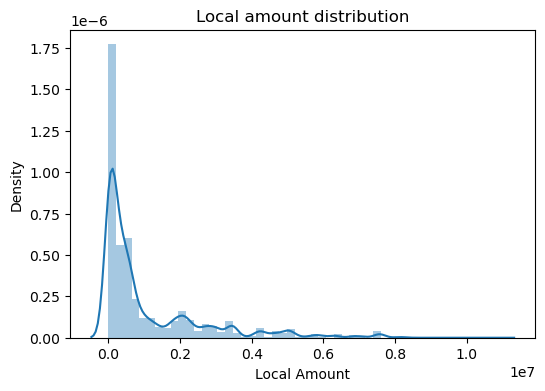

In [47]:
plt.figure(figsize=(6,4))

ax = sns.distplot(Rec_Pay_data['Local Amount'])
plt.title("Local amount distribution")
plt.show()

#### Need to drop Local Amount column as it has number of curriencies and we have the USD Amount column with single currency.

In [48]:
Rec_Pay_data.drop('Local Amount', axis=1, inplace = True)

Rec_Pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,Default
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [49]:
## USD Amount
Rec_Pay_data['USD Amount'].describe().round()

count       92811.0
mean       537646.0
std        954807.0
min             1.0
25%         40453.0
50%        191287.0
75%        599614.0
max      10849829.0
Name: USD Amount, dtype: float64

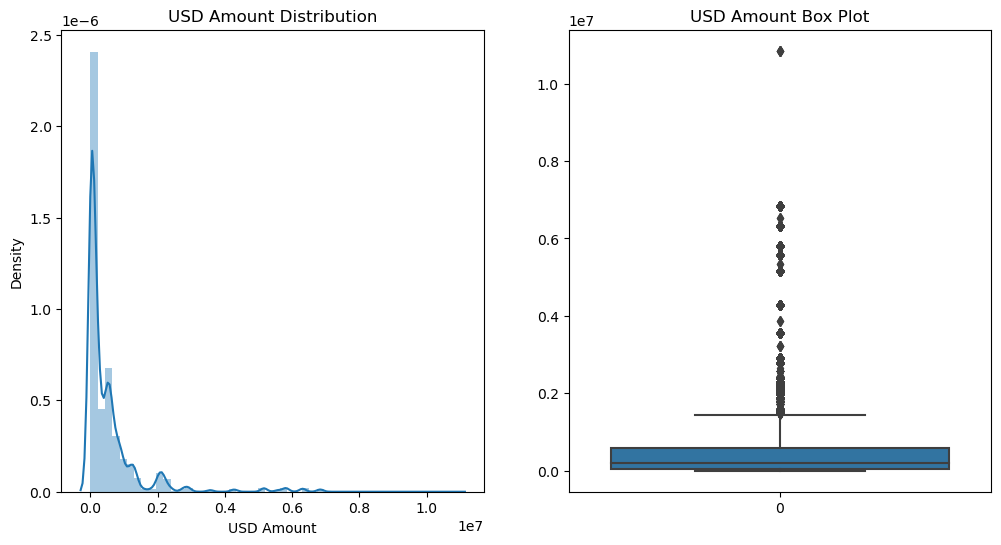

In [50]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(Rec_Pay_data['USD Amount'])
plt.title("USD Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(Rec_Pay_data['USD Amount'])
plt.title("USD Amount Box Plot")

plt.show()

### Bi-variate Analysis

In [51]:
# analysing with respect to month

In [52]:
Rec_Pay_data['month_reciept']= Rec_Pay_data['RECEIPT_DATE'].dt.month
Rec_Pay_data['month_inv_creation']= Rec_Pay_data['INVOICE_CREATION_DATE'].dt.month
Rec_Pay_data['month_due']= Rec_Pay_data['DUE_DATE'].dt.month

In [53]:
#month wise invoices due

Ord_due_month = Rec_Pay_data.groupby('month_due').count()['DUE_DATE']
Ord_due_month

month_due
1     13295
2     12893
3     14605
4     14051
5     13321
6     10479
7      1523
8      1075
9       914
10     1579
11     2875
12     6201
Name: DUE_DATE, dtype: int64

In [54]:
# Effect of monthly due on late payment rate

late_due = Rec_Pay_data.groupby('month_due').mean()['Default']
late_due.sort_index(ascending = True)

month_due
1     0.716134
2     0.688048
3     0.620199
4     0.620454
5     0.559643
6     0.416070
7     0.363099
8     0.793488
9     0.974836
10    0.999367
11    1.000000
12    0.999839
Name: Default, dtype: float64

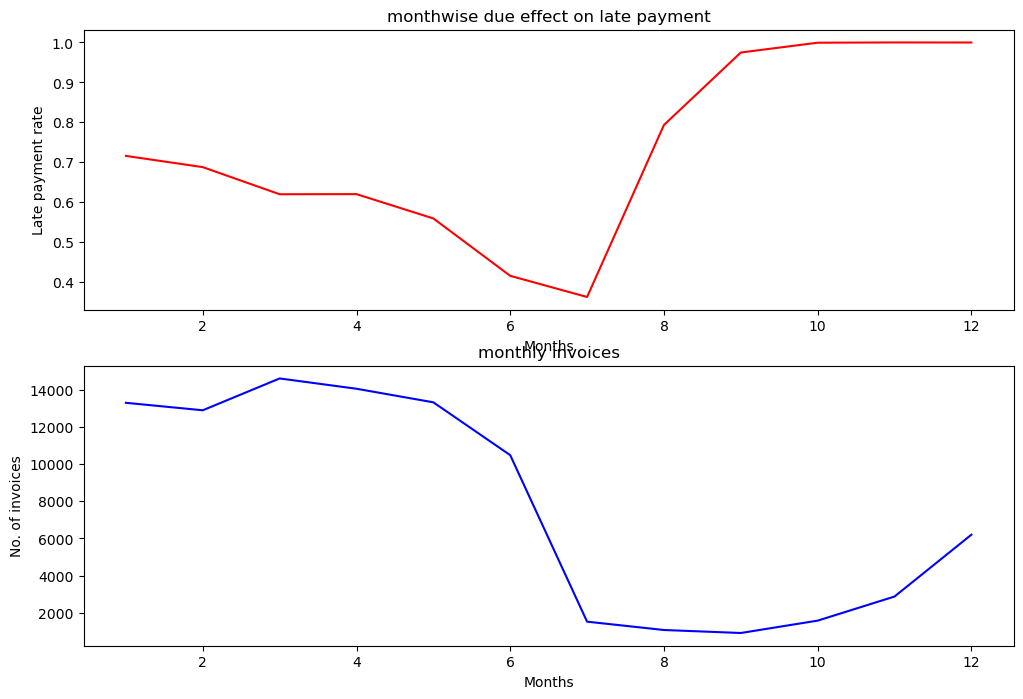

In [55]:
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.plot(late_due, color='red')
plt.title("monthwise due effect on late payment")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(Ord_due_month, color = 'blue')
plt.title("monthly invoices")
plt.xlabel("Months")
plt.ylabel("No. of invoices")

plt.show()

#### number of invoices is highest for 3rd month but the late payment rate is comparatively lower than the other months with large number of invoices.


#### from 7th month onwards the late payment increases steeply. The number of invoices are comparatively lower than the first half of the year.


In [56]:
## Receipt Date

Ord_month_receipt = Rec_Pay_data.groupby('month_reciept').count()['DUE_DATE']

monthly_receipt = Rec_Pay_data.groupby('month_due').mean()['Default']

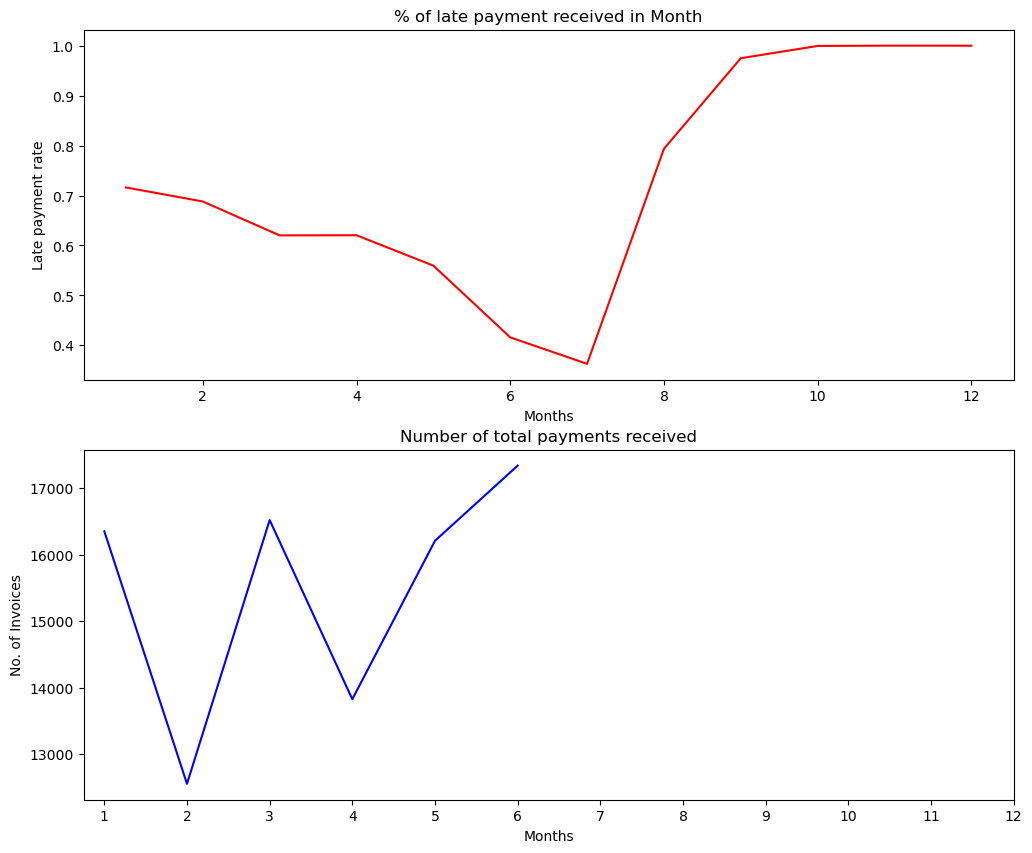

In [57]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.plot(monthly_receipt, color='red')
plt.title("% of late payment received in Month")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(Ord_month_receipt, color='blue')
plt.title("Number of total payments received")
plt.xticks([i for i in range(1,13,1)])
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

#### from 7th month there are no paymnets maid against any invoice.

In [58]:
## Invoice creation date

Ord_month_created = Rec_Pay_data.groupby('month_inv_creation').count()['DUE_DATE']

monthly_created = Rec_Pay_data.groupby('month_inv_creation').mean()['Default']

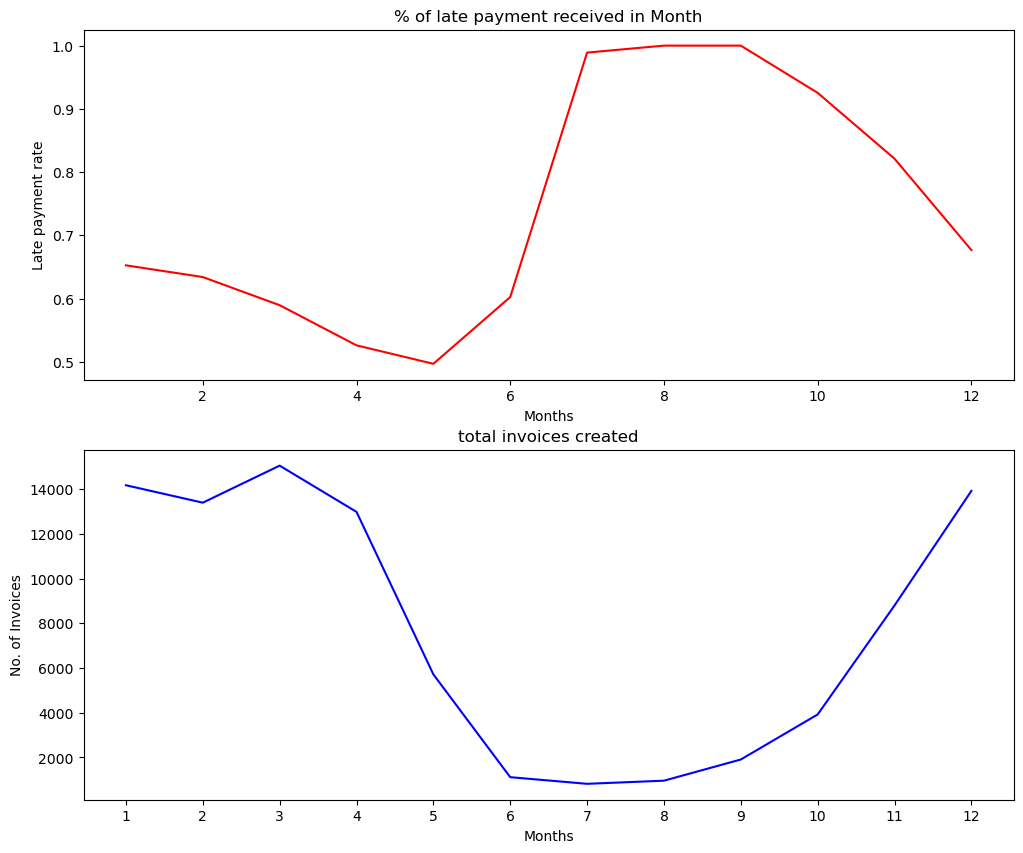

In [59]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.plot(monthly_created, color='red')
plt.title("% of late payment received in Month")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(Ord_month_created, color='blue')
plt.title("total invoices created")
plt.xticks([i for i in range(1,13,1)])
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

####  Late payment rate descreases from 1st to 5th month and from 7th it increases gradually

In [60]:
## USD Amount Column

usd_amt_late = Rec_Pay_data.pivot_table(values='USD Amount', index='Default', aggfunc=['mean', 'median', np.std]).reset_index()
usd_amt_late

,Default,mean,median,std
,,USD Amount,USD Amount,USD Amount
0,0,575247.544230,224785.0410,879205.782363
1,1,517974.153529,165499.3105,991505.462081


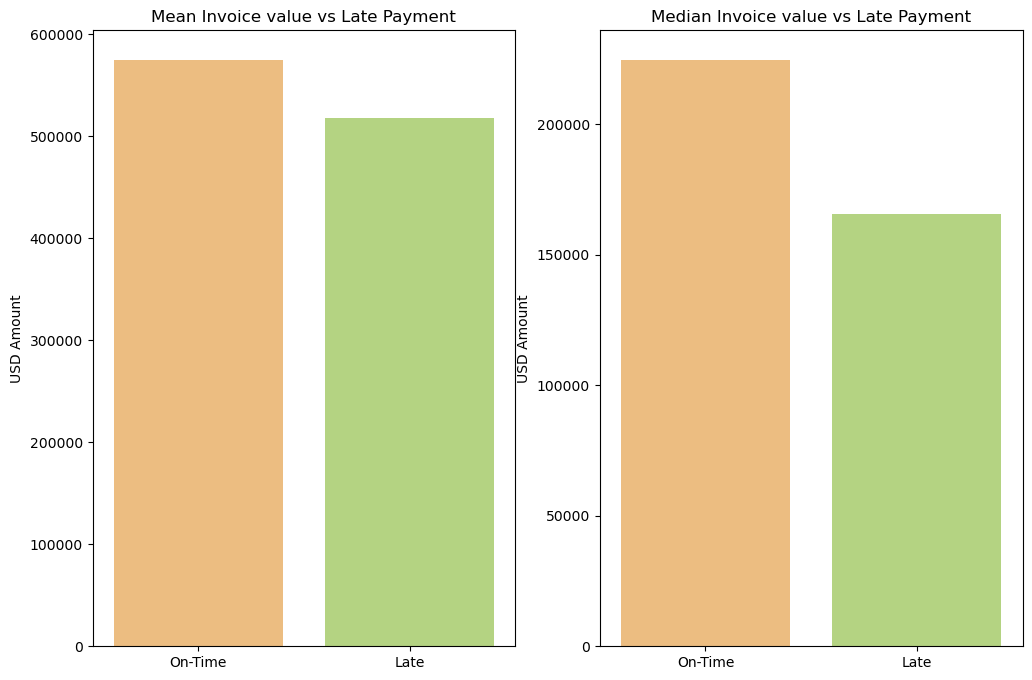

In [61]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)

sns.barplot(data=usd_amt_late, x='Default', y=('mean','USD Amount'), palette='RdYlGn')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Mean Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.subplot(1,2,2)

sns.barplot(data=usd_amt_late, x='Default', y=('median','USD Amount'), palette='RdYlGn')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Median Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.show()

#### The mean and median of invoice value of On-time bill payment is higher than late payment.

In [62]:
## Customer_name

customer_total_orders = Rec_Pay_data.groupby('CUSTOMER_NAME').count()['Default'].sort_values(ascending=False).reset_index()
customer_total_orders_late = Rec_Pay_data.groupby('CUSTOMER_NAME').mean()['Default'].sort_values(ascending=False).reset_index()

In [63]:
#important customers 
imp_cust = customer_total_orders[customer_total_orders['Default'] > 500]['CUSTOMER_NAME']
imp_cust

0     SEPH Corp
1     FARO Corp
2     PARF Corp
3     ALLI Corp
4     AREE Corp
5     DEBE Corp
6     RADW Corp
7     YOUG Corp
8     HABC Corp
9     CARR Corp
10    AL T Corp
11    VAVA Corp
12    CGR  Corp
13    REAL Corp
14    PARI Corp
15    ARAB Corp
16    LIFE Corp
17    AL S Corp
18    MCT  Corp
19    CWF  Corp
20    AL F Corp
21    CHRI Corp
Name: CUSTOMER_NAME, dtype: object

In [64]:
#late payment rate for only imp customers

imp_cust_late = customer_total_orders_late[customer_total_orders_late['CUSTOMER_NAME'].isin(imp_cust)]
imp_cust_late

,CUSTOMER_NAME,Default
201,YOUG Corp,1.000000
246,VAVA Corp,0.937873
256,AL T Corp,0.917241
273,LIFE Corp,0.899522
287,PARI Corp,0.876153
306,PARF Corp,0.847222
308,AL S Corp,0.842788
341,CHRI Corp,0.787276
342,CARR Corp,0.786765
380,HABC Corp,0.726106


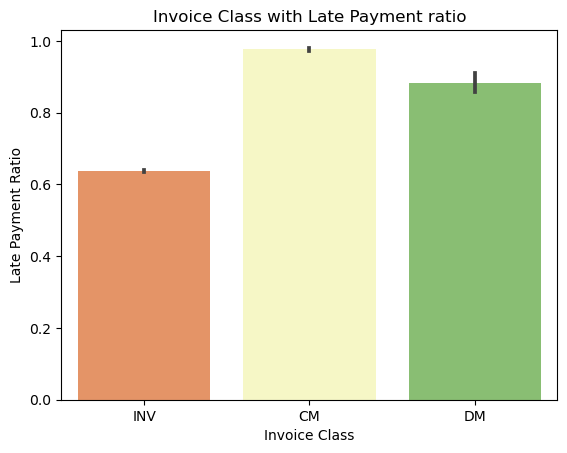

In [65]:
## Invoice_class

sns.barplot(data=Rec_Pay_data, x='INVOICE_CLASS', y='Default', estimator=np.mean, palette='RdYlGn')
plt.title("Invoice Class with Late Payment ratio")
plt.xlabel("Invoice Class")
plt.ylabel("Late Payment Ratio")
plt.show()

#### Late payment ratio is very high for CM and lowest for INV INVOICE_CLASS.

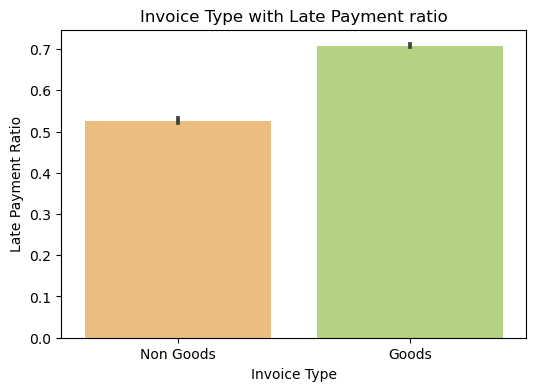

In [66]:
## Invoice_type 
plt.figure(figsize=(6,4))

sns.barplot(data=Rec_Pay_data, x='INVOICE_TYPE', y='Default', estimator=np.mean, palette='RdYlGn')
plt.title("Invoice Type with Late Payment ratio")
plt.xlabel("Invoice Type")
plt.ylabel("Late Payment Ratio")
plt.show()

#### Late payment ratio for Goods is higher than Non-Goods.

## Feature Engineering

In [67]:
## Payment_term
# to get cumulative on value_counts

pay_term_cumsum = Rec_Pay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
15 Days from EOM                                           0.701533
Immediate Payment                                          0.760449
Immediate                                                  0.813740
90 Days from EOM                                           0.855685
45 Days from Inv Date                                      0.893935
45 Days from EOM                                           0.931743
90 Days from Inv Date                                      0.955566
100% Adv Payment                                           0.968905
25 DAYS FROM EOM                                           0.973882
Cash on Delivery                                           0.978386
15 Days from Inv Date                           

In [68]:
#Immediate and Immediate payment are same
Rec_Pay_data['PAYMENT_TERM'] = Rec_Pay_data['PAYMENT_TERM'].replace('Immediate', 'Immediate Payment')

In [69]:
#45 Days from EOM and 45 DAYS + EOM are giving same information
Rec_Pay_data['PAYMENT_TERM'] = Rec_Pay_data['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')

In [70]:
pay_term_cumsum = Rec_Pay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

60 Days from Inv Date                                      0.212712
30 Days from Inv Date                                      0.363793
60 Days from EOM                                           0.498605
30 Days from EOM                                           0.620368
Immediate Payment                                          0.732575
15 Days from EOM                                           0.813740
90 Days from EOM                                           0.855685
45 Days from EOM                                           0.896963
45 Days from Inv Date                                      0.935212
90 Days from Inv Date                                      0.959035
100% Adv Payment                                           0.972374
25 DAYS FROM EOM                                           0.977352
Cash on Delivery                                           0.981856
15 Days from Inv Date                                      0.985691
On Consignment                                  

#### 95% of data is covered by 10 values, hence clubbing the rest of the values to others in both datasets.

In [71]:
vals_to_keep= pay_term_cumsum.index[:10]

In [72]:
#clubbing rest values--> Others
Rec_Pay_data['PAYMENT_TERM'] = Rec_Pay_data['PAYMENT_TERM'].apply(lambda x : x if x in vals_to_keep else 'Others')

Rec_Pay_data['PAYMENT_TERM'].value_counts()

60 Days from Inv Date    19742
30 Days from Inv Date    14022
60 Days from EOM         12512
30 Days from EOM         11301
Immediate Payment        10414
15 Days from EOM          7533
90 Days from EOM          3893
45 Days from EOM          3831
Others                    3802
45 Days from Inv Date     3550
90 Days from Inv Date     2211
Name: PAYMENT_TERM, dtype: int64

### Dummy Variable

In [73]:
## Payment_term

term_dummies = pd.get_dummies(Rec_Pay_data['PAYMENT_TERM']).drop('Others',axis=1)

Rec_Pay_data=Rec_Pay_data.join(term_dummies).drop('PAYMENT_TERM',axis=1)
Rec_Pay_data.shape

(92811, 26)

In [74]:
## Invoice_class

class_dummies = pd.get_dummies(Rec_Pay_data['INVOICE_CLASS'])

Rec_Pay_data=Rec_Pay_data.join(class_dummies).drop('INVOICE_CLASS',axis=1)
Rec_Pay_data.shape

(92811, 28)

In [75]:
Rec_Pay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'Default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

## Open Invoice Data

In [76]:
Opn_INV_data = pd.read_csv("Open_Invoice_data.csv", encoding = 'latin1')
Opn_INV_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [77]:
Opn_INV_data.shape

(88204, 14)

In [78]:
Opn_INV_data.describe()

,Customer Account No,AGE
count,88201.000000,88204.000000
mean,21911.718291,183.430706
std,17427.778620,368.123334
min,1044.000000,-359.000000
25%,3925.000000,-17.000000
50%,20998.000000,47.000000
75%,35066.000000,242.000000
max,55049.000000,7343.000000


In [79]:
Opn_INV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AS_OF_DATE            88204 non-null  object 
 1   Customer Type         88204 non-null  object 
 2   Customer_Name         88204 non-null  object 
 3   Customer Account No   88201 non-null  float64
 4   Transaction Number    88195 non-null  object 
 5   Transaction Date      88204 non-null  object 
 6   Payment Term          88204 non-null  object 
 7   Due Date              88204 non-null  object 
 8   Transaction Currency  88204 non-null  object 
 9   Local Amount          88204 non-null  object 
 10  Transaction Class     88204 non-null  object 
 11  AGE                   88204 non-null  int64  
 12  USD Amount            88204 non-null  object 
 13  INV_CREATION_DATE     88204 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.4+ MB


In [80]:
# Removing unnecessary columns
Opn_INV_data.drop(['AS_OF_DATE','Customer Type','Transaction Date','Transaction Currency','Transaction Number',
              'Customer Account No','Local Amount'], axis= 1, inplace= True)

In [81]:
Opn_INV_data.shape

(88204, 7)

In [82]:
Opn_INV_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,"3,800",3/3/2022 22:30


In [83]:
Opn_INV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      88204 non-null  object
 1   Payment Term       88204 non-null  object
 2   Due Date           88204 non-null  object
 3   Transaction Class  88204 non-null  object
 4   AGE                88204 non-null  int64 
 5   USD Amount         88204 non-null  object
 6   INV_CREATION_DATE  88204 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.7+ MB


In [84]:
Opn_INV_data.isnull().sum()

Customer_Name        0
Payment Term         0
Due Date             0
Transaction Class    0
AGE                  0
USD Amount           0
INV_CREATION_DATE    0
dtype: int64

#### There are no null values

In [85]:
## changing to date format
Opn_INV_data['Due Date'] = pd.to_datetime(Opn_INV_data['Due Date'])
Opn_INV_data['INV_CREATION_DATE'] = pd.to_datetime(Opn_INV_data['INV_CREATION_DATE'])

In [86]:
## USD_Amount is also an object data type. Need to change it to int

Opn_INV_data['USD Amount'].unique()

array(['-3,088', '2,000', '2,415', ..., '-914', '12,866', '18,118'],
      dtype=object)

In [87]:
Opn_INV_data['USD Amount'] = Opn_INV_data['USD Amount'].apply(lambda x: x.replace(",", ""))
Opn_INV_data['USD Amount'] = Opn_INV_data['USD Amount'].astype(int)

In [88]:
Opn_INV_data['USD Amount']

0        -3088
1         2000
2         2000
3         2415
4         3800
         ...  
88199    -1199
88200     -914
88201    12866
88202    18118
88203    18499
Name: USD Amount, Length: 88204, dtype: int32

#### Need to remove the negative values and 0 from USD Amount

In [89]:
Opn_INV_data = Opn_INV_data[Opn_INV_data['USD Amount']>0]

In [90]:
Opn_INV_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79516 entries, 1 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      79516 non-null  object        
 1   Payment Term       79516 non-null  object        
 2   Due Date           79516 non-null  datetime64[ns]
 3   Transaction Class  79516 non-null  object        
 4   AGE                79516 non-null  int64         
 5   USD Amount         79516 non-null  int32         
 6   INV_CREATION_DATE  79516 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 4.5+ MB


#### Format for all columns is correct now

### Feature Engineering

In [91]:
# Keeping the same terms as done in recieved payment dataset
Opn_INV_data['Payment Term'] = Opn_INV_data['Payment Term'].apply(lambda x: x if x in vals_to_keep else 'Others')

Opn_INV_data['Payment Term'].value_counts()

30 Days from Inv Date    18328
60 Days from Inv Date    17599
Immediate Payment        16202
60 Days from EOM          8170
Others                    5385
30 Days from EOM          5324
90 Days from EOM          2595
90 Days from Inv Date     2429
45 Days from Inv Date     1533
15 Days from EOM          1097
45 Days from EOM           854
Name: Payment Term, dtype: int64

#### Dummy creation

In [92]:
term_dummies_open = pd.get_dummies(Opn_INV_data['Payment Term']).drop('Others', axis=1)

In [93]:
# joining dummies into open data frame
Opn_INV_data = Opn_INV_data.join(term_dummies_open).drop('Payment Term', axis=1)
Opn_INV_data.head()


,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0
3,AL R Corp,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0
4,ALLI Corp,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0
5,ALLI Corp,2022-04-30,INVOICE,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0


In [94]:
## Transaction_Class
Opn_INV_data['Transaction Class'].value_counts()

INVOICE       78251
DEBIT NOTE     1265
Name: Transaction Class, dtype: int64

In [95]:
# replacing invoice with INV, Debit note with DM
Opn_INV_data['Transaction Class'] = Opn_INV_data['Transaction Class'].map(lambda x: 'INV' if x=='INVOICE' else 'DM')

In [96]:
# Dummy creation
term_dummy_opn = pd.get_dummies(Opn_INV_data['Transaction Class'])
Opn_INV_data = Opn_INV_data.join(term_dummy_opn).drop('Transaction Class', axis=1)


In [97]:
# 'CM' level to the open_data dataset same as received payment data
Opn_INV_data['CM'] = 0

In [98]:
Opn_INV_data.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,0
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0
3,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0


### Columns in Received payment and open invoice dataset

In [99]:
Rec_Pay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'Default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

In [100]:
Opn_INV_data.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV', 'CM'],
      dtype='object')

#### Characteristics specific to customers may also serve as significant independent variables for the model. Customer segmentation can help identify these characteristics. You need to categorize your customers using two metrics: the average number of days it takes for a customer to make a payment and the variation in payment time.Clustering methods will yield several unique groups of customers, which can then be used as input variables for the machine learning model.

In [101]:
# Creating a new column to show actual number of days taken to make the payment after invoice generation
Rec_Pay_data['act_days_for_pay'] = (Rec_Pay_data['RECEIPT_DATE']-Rec_Pay_data['INVOICE_CREATION_DATE']).dt.days

In [102]:
# customer wise average days for payment
cust_seg1= Rec_Pay_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].mean()
cust_seg1 = cust_seg1.to_frame()
cust_seg1.reset_index
cust_seg1.rename(columns={'act_days_for_pay': 'Avg days for payment'}, inplace=True)
cust_seg1.head()

,Avg days for payment
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250


In [103]:
# the standard deviation for customer wise payment days
cust_seg2 = Rec_Pay_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].std()
cust_seg2 = cust_seg2.to_frame()
cust_seg2.reset_index
cust_seg2.rename(columns={'act_days_for_pay': 'Std deviation for payment'}, inplace=True)
cust_seg2.head()

,Std deviation for payment
CUSTOMER_NAME,
3D D Corp,13.040449
6TH Corp,7.952987
A3 D Corp,52.581366
ABC Corp,0.000000
ABDU Corp,54.919326


In [104]:
# merging cust_seg1 and cust+seg2

cust_seg = pd.merge(cust_seg1, cust_seg2, how='inner', on='CUSTOMER_NAME')

cust_seg.head()

,Avg days for payment,Std deviation for payment
CUSTOMER_NAME,,
3D D Corp,24.395349,13.040449
6TH Corp,40.666667,7.952987
A3 D Corp,45.400000,52.581366
ABC Corp,16.000000,0.000000
ABDU Corp,76.906250,54.919326


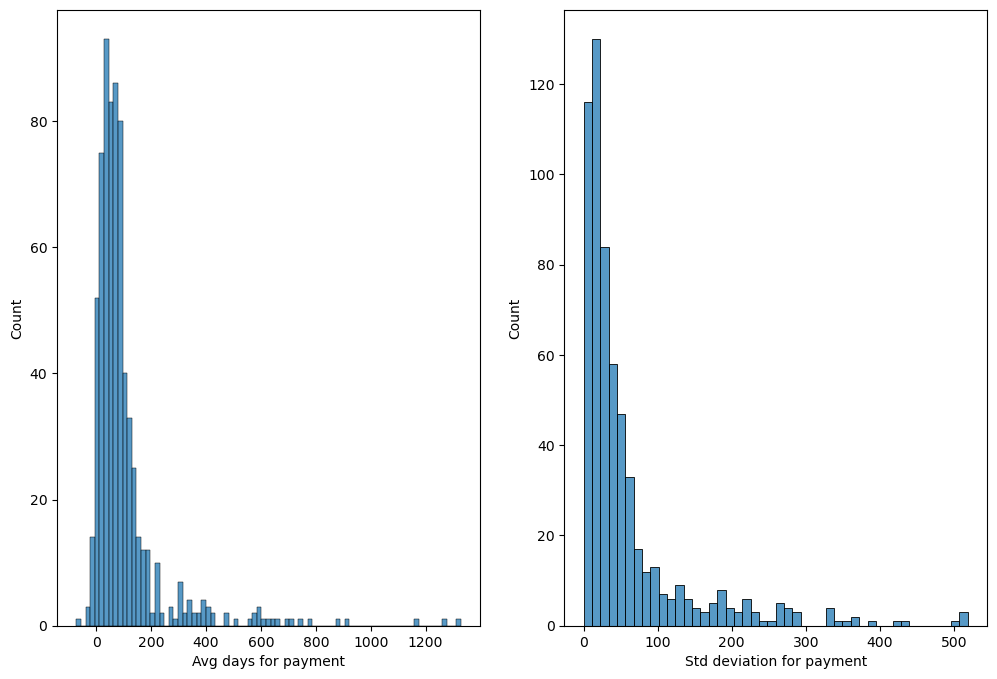

In [105]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'])

plt.show()

#### Above plots are skewed (not normalised), we need to do scaling

In [106]:
# importing libraries
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cust_seg[['Avg days for payment', 'Std deviation for payment']]= scaler.fit_transform(cust_seg[['Avg days for payment', 'Std deviation for payment']])

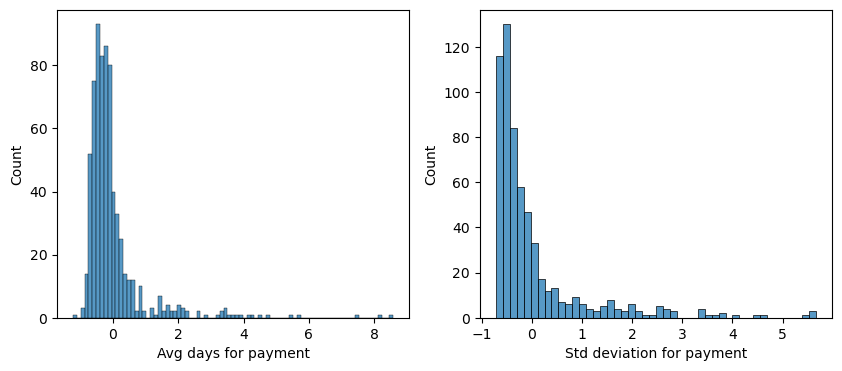

In [107]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'])

plt.show()

In [108]:
# resetting the index
cust_seg.reset_index(inplace=True)

# Checking the null values if present
round(cust_seg.isna().sum()/len(cust_seg.index), 4)

CUSTOMER_NAME                0.0000
Avg days for payment         0.0000
Std deviation for payment    0.1248
dtype: float64

In [109]:
# Replacing the null values for Std deviation for payment with 0
cust_seg['Std deviation for payment'].fillna(0,inplace=True)

In [110]:
# copying the cust_seg data for clustering into new dataframe
cluster_df = cust_seg.copy()
cluster_df.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment
0,3D D Corp,-0.534519,-0.563303
1,6TH Corp,-0.420640,-0.626042
2,A3 D Corp,-0.387513,-0.075683
3,ABC Corp,-0.593276,-0.724119
4,ABDU Corp,-0.167009,-0.046851


In [111]:
#dropping customer_name for clustering
cluster_df.drop('CUSTOMER_NAME',axis=1,inplace=True)
cluster_df.head()

,Avg days for payment,Std deviation for payment
0,-0.534519,-0.563303
1,-0.420640,-0.626042
2,-0.387513,-0.075683
3,-0.593276,-0.724119
4,-0.167009,-0.046851


### Clustering

In [112]:
# importing libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [113]:
# k-means 
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(cluster_df)
kmeans.cluster_centers_

array([[-0.28929257, -0.32371257],
       [ 1.84767202,  3.39458791],
       [ 0.42790664,  1.05103074],
       [ 4.66736808,  0.44512922]])

In [114]:
# silhouette analysis
cluster_range = [2,3,4,5,6,7,8]

for clusters in cluster_range:
    
    kmeans = KMeans(n_clusters=clusters, max_iter=50, random_state=42)
    kmeans.fit(cluster_df)
    
    cluster_labels=kmeans.labels_
    
    #silhouette score
    silhouette_avg = silhouette_score(cluster_df,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.7557759850933141
For n_clusters=3, the silhouette score is 0.73503646233166
For n_clusters=4, the silhouette score is 0.6182691953064194
For n_clusters=5, the silhouette score is 0.6209288452882942
For n_clusters=6, the silhouette score is 0.40252553894618825
For n_clusters=7, the silhouette score is 0.4069490441271981
For n_clusters=8, the silhouette score is 0.4151884768372497


 #### silhouette score is decent for n_cluster 3, selecting n_clusters as 3.

In [115]:
kmeans=KMeans(n_clusters = 3, max_iter = 50, random_state = 42)
kmeans.fit(cluster_df)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [116]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [117]:
# Assigning labels to the cust_seg dataframe
cust_seg['cluster_id'] = kmeans.labels_
cust_seg.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment,cluster_id
0,3D D Corp,-0.534519,-0.563303,2
1,6TH Corp,-0.420640,-0.626042,2
2,A3 D Corp,-0.387513,-0.075683,2
3,ABC Corp,-0.593276,-0.724119,2
4,ABDU Corp,-0.167009,-0.046851,2


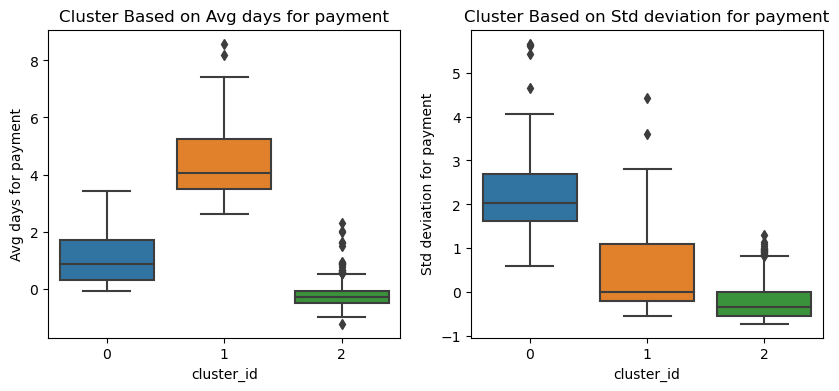

In [118]:
# Plotting box plot based on clusters
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='Avg days for payment', data=cust_seg)
plt.title("Cluster Based on Avg days for payment")


plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Std deviation for payment', data=cust_seg)
plt.title("Cluster Based on Std deviation for payment")
plt.show()

#### Cluster 0 - Medium invoice payment
#### Cluster 1 - Prolonged invoice payment
#### Cluster 2 - Early Invoice payment

In [119]:
# Dropping the 'Avg days for payment' and 'Std deviation for payment' columns for merging this dataset with open invoice 
# dataset to assign cluster id to each customers
cust_seg.drop(['Avg days for payment', 'Std deviation for payment'], axis=1, inplace=True)

In [120]:
cust_dict = cust_seg.copy()

In [121]:
# Renaming the columns
cust_dict.rename(columns={'CUSTOMER_NAME':'Customer_Name'}, inplace=True)
cust_dict.head()

,Customer_Name,cluster_id
0,3D D Corp,2
1,6TH Corp,2
2,A3 D Corp,2
3,ABC Corp,2
4,ABDU Corp,2


In [122]:
# setting index
cust_dict.set_index('Customer_Name')

,cluster_id
Customer_Name,
3D D Corp,2
6TH Corp,2
A3 D Corp,2
ABC Corp,2
ABDU Corp,2
...,...
YOUS Corp,2
ZAHR Corp,2
ZAIN Corp,2


Text(0.5, 1.0, 'Customer Segment Distribution Chart')

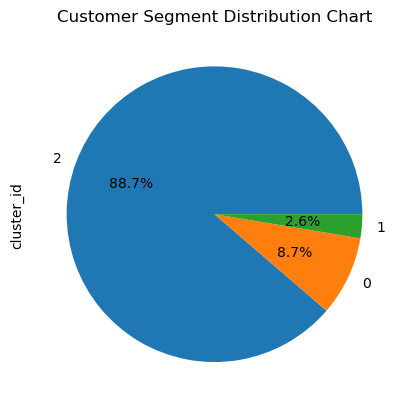

In [123]:
(cust_dict.cluster_id.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Customer Segment Distribution Chart")

#### Early customers comprise of 88.7% of customers whereas medium and prolonged payers are 11.3% in total

In [124]:
# Merging rec_pay_data and cust_deg to add clustering index
merged_df = pd.merge(Rec_Pay_data, cust_seg, how='inner', on='CUSTOMER_NAME')
merged_df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV,act_days_for_pay,cluster_id
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.630400,14200000001,2020-11-02,2020-12-30,AED,...,0,0,0,0,0,0,0,1,169,2
1,WIRE,C EA Corp,37403,2021-05-19,AED,2859.090000,1.2721E+11,2021-04-07,2021-05-30,AED,...,0,0,0,0,0,0,0,1,42,2
2,WIRE,C EA Corp,37403,2021-02-20,AED,10.578625,2.412E+11,2020-11-26,2020-12-26,AED,...,0,0,0,0,0,0,0,1,86,2
3,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.211330,99200000043,2020-12-29,2021-01-28,SAR,...,0,0,0,0,0,0,0,1,33,2
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.609710,99210000003,2021-01-30,2021-03-01,SAR,...,0,0,0,0,0,0,0,1,1,2


In [125]:
merged_df['cluster_id'].isnull().sum()

0

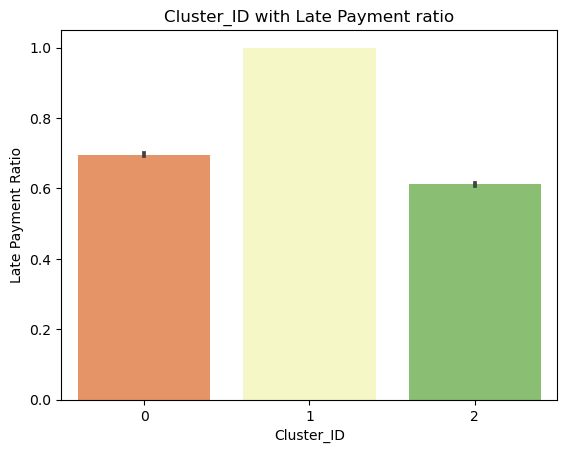

In [126]:
sns.barplot(data=merged_df, x='cluster_id', y='Default', estimator=np.mean, palette='RdYlGn')
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()

In [127]:
merged_df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'Default', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV',
       'act_days_for_pay', 'cluster_id'],
      dtype='object')

### Data Prep for Model Building

In [128]:
new_df = merged_df[['USD Amount','INVOICE_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                    '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM', 
                    '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                    'DM', 'INV', 'CM','cluster_id']]
new_df.head()

,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,101018.630400,2020-11-02,0,1,0,0,0,0,0,0,0,0,0,1,0,2
1,2859.090000,2021-04-07,0,1,0,0,0,0,0,0,0,0,0,1,0,2
2,10.578625,2020-11-26,0,0,1,0,0,0,0,0,0,0,0,1,0,2
3,48990.211330,2020-12-29,0,0,1,0,0,0,0,0,0,0,0,1,0,2
4,41991.609710,2021-01-30,0,0,1,0,0,0,0,0,0,0,0,1,0,2


In [129]:
# Creating Invoice_Month column and dropping INVOICE_CREATION_DATE
new_df['Invoice_Month'] = new_df['INVOICE_CREATION_DATE'].dt.month
new_df.drop('INVOICE_CREATION_DATE',axis=1,inplace= True)
new_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.630400,0,1,0,0,0,0,0,0,0,0,0,1,0,2,11
1,2859.090000,0,1,0,0,0,0,0,0,0,0,0,1,0,2,4
2,10.578625,0,0,1,0,0,0,0,0,0,0,0,1,0,2,11
3,48990.211330,0,0,1,0,0,0,0,0,0,0,0,1,0,2,12
4,41991.609710,0,0,1,0,0,0,0,0,0,0,0,1,0,2,1


In [130]:
new_df.shape

(92811, 16)

In [131]:
# Open Invoice dataset
open_new_df = Opn_INV_data[['Due Date','USD Amount', 'INV_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                         '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
                         '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                         'DM', 'INV', 'CM','AGE']]
open_new_df.head()

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE
1,2022-03-03,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,0,33
2,2022-04-23,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,-18
3,2022-01-19,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1,0,76
4,2022-04-30,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,-25
5,2022-04-30,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,-25


In [132]:
# Creating Invoice_Month column and dropping INV_CREATION_DATE
open_new_df['Invoice_Month'] = open_new_df['INV_CREATION_DATE'].dt.month
open_new_df.drop('INV_CREATION_DATE',axis=1,inplace= True)
open_new_df.head()

,Due Date,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month
1,2022-03-03,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2
2,2022-04-23,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3
3,2022-01-19,2415,0,0,0,0,0,0,0,0,0,0,0,1,0,76,1
4,2022-04-30,3800,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3
5,2022-04-30,1264,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3


In [133]:
# Creating Due_Month column and dropping Due Date
open_new_df['Due_Month'] = open_new_df['Due Date'].dt.month
open_new_df.drop('Due Date',axis=1,inplace= True)
open_new_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month,Due_Month
1,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2,3
2,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3,4
3,2415,0,0,0,0,0,0,0,0,0,0,0,1,0,76,1,1
4,3800,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4
5,1264,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4


In [134]:
new_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [135]:
open_new_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM', 'AGE',
       'Invoice_Month', 'Due_Month'],
      dtype='object')

### Train-Test Split

In [136]:
# Feature variables X
X = new_df.copy()
X.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.630400,0,1,0,0,0,0,0,0,0,0,0,1,0,2,11
1,2859.090000,0,1,0,0,0,0,0,0,0,0,0,1,0,2,4
2,10.578625,0,0,1,0,0,0,0,0,0,0,0,1,0,2,11
3,48990.211330,0,0,1,0,0,0,0,0,0,0,0,1,0,2,12
4,41991.609710,0,0,1,0,0,0,0,0,0,0,0,1,0,2,1


In [137]:
# Target variable y
y = merged_df['Default']
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Default, dtype: int32

In [138]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
52625,571661.900,0,0,1,0,0,0,0,0,0,0,0,1,0,2,10
29115,1157180.634,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
80920,148278.340,0,0,0,0,0,0,0,0,1,0,0,1,0,2,10
55019,490129.340,0,0,0,0,0,0,0,0,1,0,0,1,0,2,1
82266,45541.580,0,0,0,0,0,0,1,0,0,0,0,1,0,2,10


### Feature Scaling

In [139]:
X_train.shape

(64967, 16)

In [140]:
# Feature scaling for USD amount
scaler = StandardScaler()
X_train['USD Amount'] = scaler.fit_transform(X_train[['USD Amount']])
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
52625,0.038683,0,0,1,0,0,0,0,0,0,0,0,1,0,2,10
29115,0.655995,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
80920,-0.407691,0,0,0,0,0,0,0,0,1,0,0,1,0,2,10
55019,-0.047277,0,0,0,0,0,0,0,0,1,0,0,1,0,2,1
82266,-0.516006,0,0,0,0,0,0,1,0,0,0,0,1,0,2,10


In [141]:
X_train.describe()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
count,6.496700e+04,64967.00000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000
mean,1.055419e-17,0.08138,0.122324,0.150815,0.041236,0.038373,0.135761,0.212092,0.041529,0.023874,0.111641,0.005895,0.941047,0.053058,0.942663,5.465867
std,1.000008e+00,0.27342,0.327662,0.357871,0.198838,0.192097,0.342537,0.408793,0.199511,0.152657,0.314927,0.076555,0.235539,0.224150,0.997406,4.076222
min,-5.640180e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-5.219380e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,-3.628973e-01,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
75%,6.815221e-02,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,10.000000
max,1.087496e+01,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,12.000000


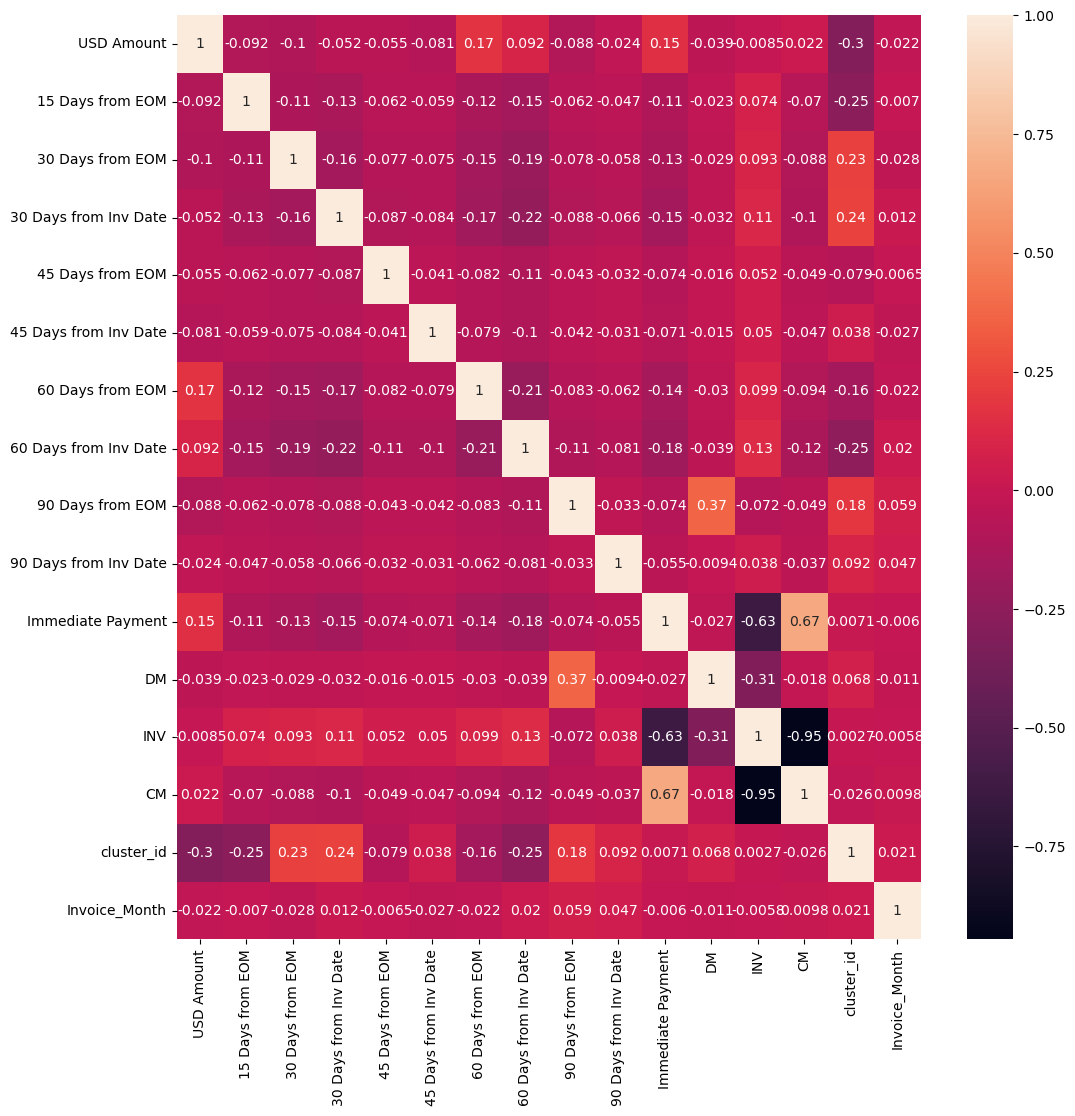

In [142]:
# checking corelation by plotting heat map
plt.figure(figsize=(12,12))

sns.heatmap(X_train.corr(), annot=True)
plt.show()


#### CM & INV, INV & Immediate Payment, DM & 90 days from EOM has high multicollinearity, hence dropping these columns.

In [143]:
X_train.drop(['CM', 'INV', 'DM'], axis=1, inplace=True)
X_test.drop(['CM', 'INV', 'DM'], axis=1, inplace=True)

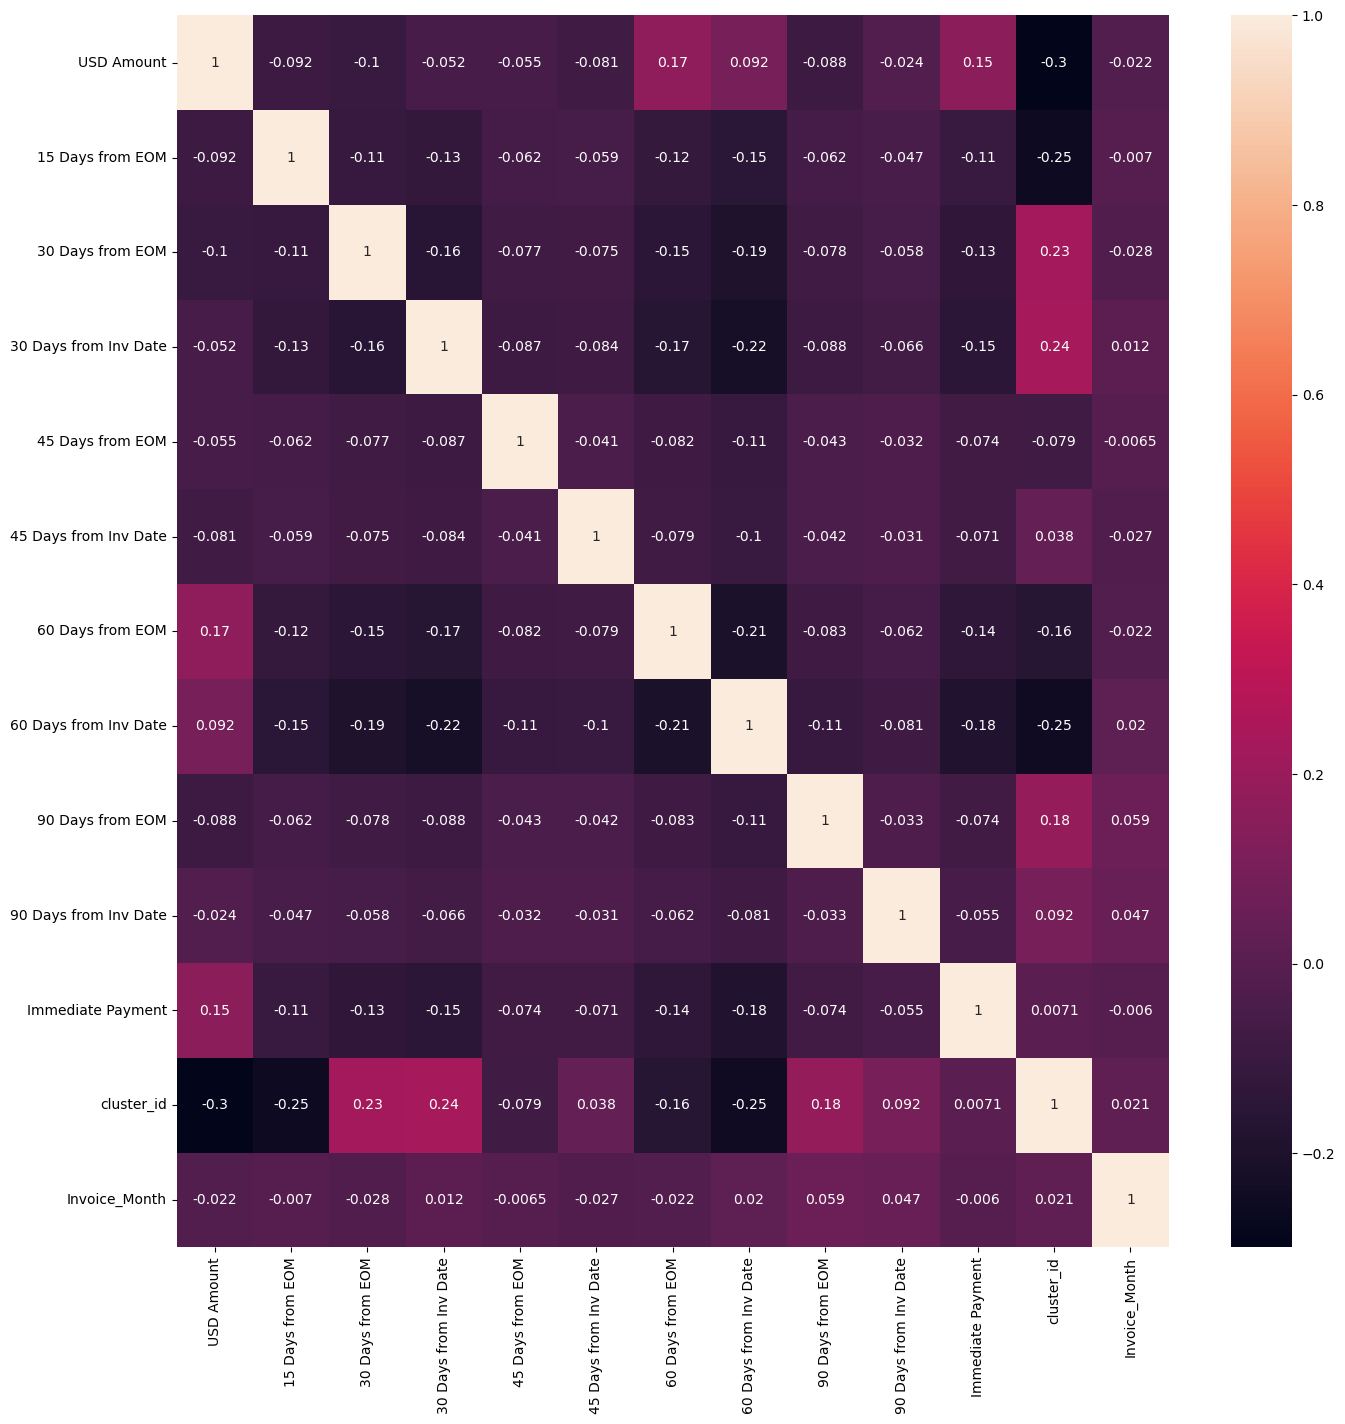

In [144]:
# Plotting heat map of X_train dataset again
plt.figure(figsize=(16,16))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

### Model building

#### Logistic regression

In [145]:
import statsmodels.api as sm

#### Model 1

In [146]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                64967
Model:                            GLM   Df Residuals:                    64953
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30211.
Date:                Tue, 07 Jan 2025   Deviance:                       60423.
Time:                        11:18:26   Pearson chi2:                 6.33e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3008
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.7818      0.049     15.840      0.000       0.685       0.878
USD Amount               -0.1132      0.012     -9.402      0.000      -0.137      -0.090
15 Days from EOM          2.6233      0.109     24.105      0.000       2.410       2.837
30 Days from EOM         -2.2427      0.052    -42.908      0.000      -2.345      -2.140
30 Days from Inv Date     0.2532      0.051      4.920      0.000       0.152       0.354
45 Days from EOM          0.3778      0.069      5.468      0.000       0.242       0.513
45 Days from Inv Date    -0.3264      0.063     -5.209      0.000      -0.449      -0.204
60 Days from EOM         -2.2324      0.053    -42.076      0.000      -2.336      -2.128
60 Days from Inv Date    -0.2874      0.050     -5.703      0.000      -0.386      -0.189
90 Days from EOM         -0.4668      0.061     -7.600      0.000      -0.587      -0.346
90 Days from Inv Date    -0.9838      0.069    -14.249      0.000      -1.119      -0.849
Immediate Payment         3.1188      0.105     29.605      0.000       2.912       3.325
cluster_id               -0.1552      0.012    -12.755      0.000      -0.179      -0.131
Invoice_Month             0.0958      0.003     37.832      0.000       0.091       0.101
=========================================================================================
"""

#### VIF

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Invoice_Month,2.68
11,cluster_id,2.60
3,30 Days from Inv Date,1.66
2,30 Days from EOM,1.52
7,60 Days from Inv Date,1.45
10,Immediate Payment,1.36
6,60 Days from EOM,1.30
8,90 Days from EOM,1.26
0,USD Amount,1.20
1,15 Days from EOM,1.14


#### Both VIF and p-value are in acceptable range, hence we can go with this module

In [149]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

52625    0.842600
29115    0.193231
80920    0.620388
55019    0.398571
82266    0.768503
16093    0.977186
54916    0.695423
15532    0.989683
2618     0.783162
79771    0.796924
dtype: float64

In [150]:
# Reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84260047, 0.19323102, 0.62038841, 0.39857148, 0.76850257,
       0.97718586, 0.6954225 , 0.9896831 , 0.78316174, 0.79692434])

In [151]:
# Creating a dataframe for predicted values
y_pred = pd.DataFrame({'Default':y_train.values, 'Default_pred':y_train_pred})
y_pred.head()

,Default,Default_pred
0,1,0.842600
1,0,0.193231
2,1,0.620388
3,1,0.398571
4,1,0.768503


In [152]:
# Making the prediction based on 0.5 cutoff
y_pred['logreg_pred'] = y_pred['Default_pred'].map(lambda x:1 if x>0.5 else 0) 
y_pred.head()

,Default,Default_pred,logreg_pred
0,1,0.842600,1
1,0,0.193231,0
2,1,0.620388,1
3,1,0.398571,0
4,1,0.768503,1


In [153]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from statsmodels.tools.tools import add_constant

In [154]:
# Confusion Matrix
confusion = confusion_matrix(y_pred.Default, y_pred.logreg_pred)
confusion

array([[12799,  9577],
       [ 4526, 38065]], dtype=int64)

In [155]:
# Accuracy
print(accuracy_score(y_pred.Default, y_pred.logreg_pred))

0.782920559668755


#### Train dataset have 78.29% accuracy

In [156]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.893733417858233

In [158]:
# specificity
specificity = TN / float(TN+FP)
specificity

0.5719967822667144

In [159]:
# false postive rate
print(FP/ float(TN+FP))

0.42800321773328565


In [160]:
# positive predictive value 
print (TP / float(TP+FP))

0.7989798916922044


In [161]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7387590187590187


#### Finding optimal cutoff pt

In [162]:
# Trying out multiple threshold values
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred[f'y_pred_{i}'] = y_pred['Default_pred'].apply(lambda x : 1 if x > i else 0)
y_pred

,Default,Default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9
0,1,0.842600,1,1,1,1,1,1,1,1,1,0
1,0,0.193231,0,1,0,0,0,0,0,0,0,0
2,1,0.620388,1,1,1,1,1,1,1,0,0,0
3,1,0.398571,0,1,1,1,0,0,0,0,0,0
4,1,0.768503,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64962,1,0.990115,1,1,1,1,1,1,1,1,1,1
64963,1,0.526386,1,1,1,1,1,1,0,0,0,0
64964,1,0.652419,1,1,1,1,1,1,1,0,0,0
64965,0,0.193817,0,1,0,0,0,0,0,0,0,0


In [163]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred.Default, y_pred[f'y_pred_{i}'])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.655579  1.000000  0.000000
0.2   0.2  0.702156  0.972882  0.186852
0.3   0.3  0.775578  0.949309  0.444896
0.4   0.4  0.775840  0.910544  0.519440
0.5   0.5  0.782921  0.893733  0.571997
0.6   0.6  0.774224  0.856942  0.616777
0.7   0.7  0.720042  0.688479  0.780122
0.8   0.8  0.645728  0.496372  0.930014
0.9   0.9  0.540967  0.306074  0.988068


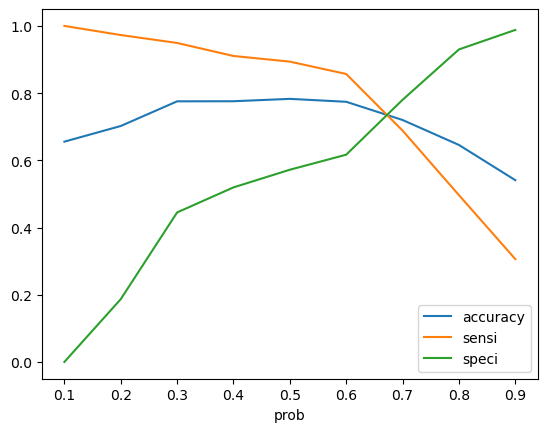

In [164]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### 0.6 is the optimum point to take it as a cutoff probability.

In [165]:
# Creating a column based on 0.6 cutoff for prediction
y_pred['final_predicted'] = y_pred.Default_pred.map( lambda x: 1 if x > 0.6 else 0)

y_pred.head()

,Default,Default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9,final_predicted
0,1,0.842600,1,1,1,1,1,1,1,1,1,0,1
1,0,0.193231,0,1,0,0,0,0,0,0,0,0,0
2,1,0.620388,1,1,1,1,1,1,1,0,0,0,1
3,1,0.398571,0,1,1,1,0,0,0,0,0,0,0
4,1,0.768503,1,1,1,1,1,1,1,1,0,0,1


In [166]:
# Let's check the overall accuracy.
accuracy_score(y_pred.Default, y_pred.final_predicted)

0.7742238367171025

In [167]:
# Precision Score
precision_score(y_pred.Default, y_pred.final_predicted)

0.8097530672464669

In [168]:
# Recall Score
recall_score(y_pred.Default, y_pred.final_predicted)

0.8569416073818412

In [169]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred.Default, y_pred.Default_pred)

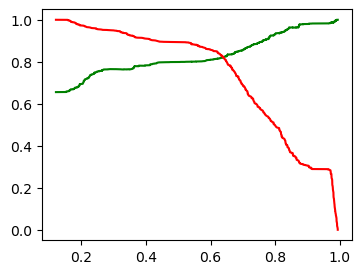

In [170]:
plt.figure(figsize=(4,3))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### On Precision & Recall trade off we found optimal cutoff of between 0.6 & 0.7 . Hence keeping the optimal cutoff 0.6.

#### PLotting ROC curve

In [171]:
from sklearn.metrics import roc_auc_score,roc_curve

In [172]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [173]:
fpr, tpr, thresholds = roc_curve(y_pred.Default,y_pred.Default_pred,drop_intermediate = False)

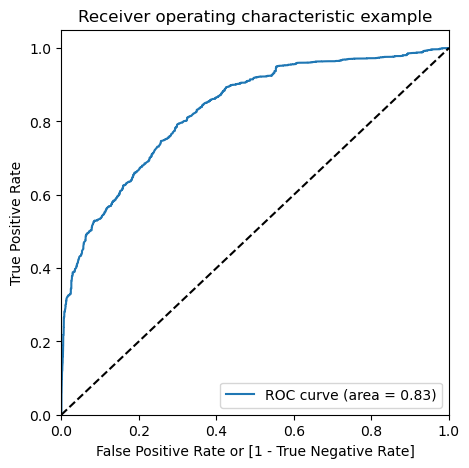

In [174]:
draw_roc(y_pred.Default,y_pred.Default_pred)

#### AUC = 0.83 which shows the model is good.

In [175]:
#### Predictions on test set

In [176]:
# Transforming the numerical column of test set
X_test[['USD Amount']]= scaler.transform(X_test[['USD Amount']])
X_test.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,cluster_id,Invoice_Month
12743,-0.282967,0,0,0,0,0,0,0,0,0,1,0,12
75338,-0.543059,0,1,0,0,0,0,0,0,0,0,2,1
39614,0.811935,0,0,0,0,0,0,1,0,0,0,0,4
52529,0.038683,0,0,0,0,0,0,0,0,1,0,2,10
47001,-0.383619,0,1,0,0,0,0,0,0,0,0,2,4


In [177]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [178]:
#Making predictions on the test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

12743    0.993829
75338    0.166005
39614    0.686859
52529    0.608420
47001    0.206693
90315    0.587936
28144    0.653187
29929    0.204446
80190    0.707432
1736     0.887864
dtype: float64

In [179]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [180]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [181]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [182]:
y_test_df.head()

,Default,CustID
12743,1,12743
75338,1,75338
39614,1,39614
52529,1,52529
47001,0,47001


In [183]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [184]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [185]:
y_pred_final.head()

,Default,CustID,0
0,1,12743,0.993829
1,1,75338,0.166005
2,1,39614,0.686859
3,1,52529,0.608420
4,0,47001,0.206693


In [186]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Delay_Prob','target':'Delay'})
y_pred_final.head()

,Default,CustID,Delay_Prob
0,1,12743,0.993829
1,1,75338,0.166005
2,1,39614,0.686859
3,1,52529,0.608420
4,0,47001,0.206693


In [187]:
# Creating final prediction on test set based on 0.6 cutoff
y_pred_final['final_predicted'] = y_pred_final.Delay_Prob.map(lambda x: 1 if x >= 0.6 else 0)
y_pred_final.head()

,Default,CustID,Delay_Prob,final_predicted
0,1,12743,0.993829,1
1,1,75338,0.166005,0
2,1,39614,0.686859,1
3,1,52529,0.608420,1
4,0,47001,0.206693,0


In [188]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.Default, y_pred_final.final_predicted)

0.7754632955035196

In [189]:
#precision score
precision_score(y_pred_final.Default, y_pred_final.final_predicted)

0.8115658179569116

In [190]:
# Recall Score
recall_score(y_pred.Default, y_pred.final_predicted)

0.8569416073818412

#### train and test accuracy is almost same around 77.5 %

### Random Forest

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [192]:
new_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [193]:
# creating X and y
X= new_df
y= merged_df['Default']

In [194]:
# Splitting into train and test set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

In [195]:
# Building a base random forest model to check the accuracy

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [196]:
# predicted values
y_train_pred_rf = rf.predict(X_train_rf)

In [197]:
# Checking accuracy and classification report
accuracy = accuracy_score(y_train_rf, y_train_pred_rf)
print(classification_report(y_train_rf, y_train_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     22376
           1       0.95      0.99      0.97     42591

    accuracy                           0.96     64967
   macro avg       0.96      0.95      0.95     64967
weighted avg       0.96      0.96      0.96     64967

Accuracy is :  0.957563070481937


In [198]:
# Using cross validation to check if our model is overfitting

rf_cv = RandomForestClassifier(random_state=42)

# Compute cross-validation scores on the training data
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=5, scoring= 'recall')

# Compute the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the cross-validation scores
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Mean score: 0.9548965957922156
Standard deviation: 0.003277954728122406


In [199]:
# Creating y_pred for test data
y_test_pred_rf = rf.predict(X_test_rf)

In [200]:
# Checking accuracy and classification report of test data
accuracy = accuracy_score(y_test_rf, y_test_pred_rf)
print(classification_report(y_test_rf, y_test_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      9502
           1       0.93      0.96      0.94     18342

    accuracy                           0.92     27844
   macro avg       0.92      0.91      0.91     27844
weighted avg       0.92      0.92      0.92     27844

Accuracy is :  0.9234305415888522


#### Hyperparameter Tuning

In [201]:
#Using Grid search for hyper-parameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs= -1)

grid_search.fit(X_train_rf, y_train_rf)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [202]:
# Best Hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train_rf)

print(classification_report(y_train_rf, y_pred_cv_rf))

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best f1 score: 0.9394084954678357
              precision    recall  f1-score   support

           0       0.97      0.90      0.94     22376
           1       0.95      0.99      0.97     42591

    accuracy                           0.96     64967
   macro avg       0.96      0.94      0.95     64967
weighted avg       0.96      0.96      0.96     64967



In [203]:
# Test set

y_pred_test_cv = best_rf.predict(X_test_rf)

print(classification_report(y_test_rf,y_pred_test_cv))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      9502
           1       0.93      0.96      0.94     18342

    accuracy                           0.92     27844
   macro avg       0.92      0.91      0.91     27844
weighted avg       0.92      0.92      0.92     27844



#### f1-score for train and test set is 0.97 and 0.94, which implies that this is a good model. Hence moving forward with this as final model for prediction

### Checking Feature Importance

In [204]:
importance = best_rf.feature_importances_
sorted_idx = importance.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {X.columns[idx]} ({importance[idx]:.3f})")

Feature ranking:
1. USD Amount (0.465)
2. Invoice_Month (0.130)
3. 60 Days from EOM (0.113)
4. 30 Days from EOM (0.105)
5. cluster_id (0.053)
6. Immediate Payment (0.042)
7. 15 Days from EOM (0.027)
8. 30 Days from Inv Date (0.015)
9. 60 Days from Inv Date (0.013)
10. 90 Days from Inv Date (0.008)
11. INV (0.007)
12. 90 Days from EOM (0.006)
13. 45 Days from EOM (0.006)
14. CM (0.004)
15. 45 Days from Inv Date (0.004)
16. DM (0.001)


### Open Invoice dataset

#### column 'AGE' which is calculated by taking the difference between Transaction Date and AS_OF_DATE. A positive value in the AGE column indicates that the payment is already overdue.But, a negative value in the AGE column means that the due date is yet to be crossed.
#### Hence, the model should be able to predict whether the payment will be delayed or not only for those customers whose AGE value is negative.

In [205]:
# Selecting rows with negative age value for prediction
open_new_df_age = Opn_INV_data[Opn_INV_data['AGE'] < 0]
open_new_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
6,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0
7,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0


In [206]:
open_new_df_age = pd.merge(open_new_df_age, cust_dict, how='left', on='Customer_Name')

In [207]:
# Null counts
open_new_df_age.isnull().sum()

Customer_Name              0
Due Date                   0
AGE                        0
USD Amount                 0
INV_CREATION_DATE          0
15 Days from EOM           0
30 Days from EOM           0
30 Days from Inv Date      0
45 Days from EOM           0
45 Days from Inv Date      0
60 Days from EOM           0
60 Days from Inv Date      0
90 Days from EOM           0
90 Days from Inv Date      0
Immediate Payment          0
DM                         0
INV                        0
CM                         0
cluster_id               768
dtype: int64

#### cluster_id has 768 null value counts, hence removing the null values as these null values are of new customers whose data is not present in the 'Received Payment data'.

In [208]:
# Dropping the rows containing null values
open_new_df_age.dropna(axis=0, inplace=True)

In [209]:
open_new_df_age.shape

(27247, 19)

In [210]:
open_new_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,2.0
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2.0
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2.0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2.0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2.0


In [211]:
open_new_df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 0 to 28014
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_Name          27247 non-null  object        
 1   Due Date               27247 non-null  datetime64[ns]
 2   AGE                    27247 non-null  int64         
 3   USD Amount             27247 non-null  int32         
 4   INV_CREATION_DATE      27247 non-null  datetime64[ns]
 5   15 Days from EOM       27247 non-null  uint8         
 6   30 Days from EOM       27247 non-null  uint8         
 7   30 Days from Inv Date  27247 non-null  uint8         
 8   45 Days from EOM       27247 non-null  uint8         
 9   45 Days from Inv Date  27247 non-null  uint8         
 10  60 Days from EOM       27247 non-null  uint8         
 11  60 Days from Inv Date  27247 non-null  uint8         
 12  90 Days from EOM       27247 non-null  uint8         
 13  9

In [212]:
# converting the cluster_id column to int
open_new_df_age['cluster_id'] = open_new_df_age['cluster_id'].astype('Int64')

In [213]:
# Checking the head after adding 'cluster_id' column
open_new_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,2
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2


In [221]:
# Creating a copy of open_new_df_age for final prediction
open_new_df_final = open_new_df_age.copy()

In [222]:
# Dropping Customer_Name and AGE column
open_new_df_final.drop(['Customer_Name', 'AGE'], axis=1, inplace=True)

In [223]:
open_new_df_final['Invoice_Month'] = open_new_df_final['INV_CREATION_DATE'].dt.month

In [224]:
# dropping due_date and invoice creation date

open_new_df_final.drop(['Due Date','INV_CREATION_DATE'], axis= 1, inplace= True)

In [225]:
open_new_df_final.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [226]:
# getting predictions on open invoices

y_open_invoices= best_rf.predict_proba(open_new_df_final)[:,1]

y_open_invoices

array([1.        , 0.86242868, 0.8071345 , ..., 0.24887183, 0.98877083,
       0.0177305 ])

In [227]:
# Adding the predicted values to the dataframe
open_new_df_age['Pred_rf'] = y_open_invoices
open_new_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Pred_rf
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,2,1.000000
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0.862429
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0.807135
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0.001456
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0.986667


In [228]:
# Customer-wise model prediction
customer_seg_prob= pd.DataFrame(open_new_df_age.groupby('Customer_Name').prod()['Pred_rf'].round(4))
customer_seg_prob

,Pred_rf
Customer_Name,
3D D Corp,0.0000
6TH Corp,0.0329
ABDU Corp,0.0000
ABEE Corp,0.0711
ABU Corp,0.0024
...,...
XPRE Corp,0.0000
YOUG Corp,0.3641
YOUS Corp,0.0000


In [229]:
# Taking 0.6 as cut off value
open_new_df_age['Final_Prediction'] = open_new_df_age.Pred_rf.map(lambda x: 1 if x>0.6 else 0)

In [230]:
open_new_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,...,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Pred_rf,Final_Prediction
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,...,0,0,0,0,0,1,0,2,1.000000,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,...,0,0,0,0,0,1,0,2,0.862429,1
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,...,0,0,0,0,0,1,0,2,0.807135,1
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,...,0,0,0,0,0,1,0,2,0.001456,0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,...,0,0,0,0,0,1,0,2,0.986667,1


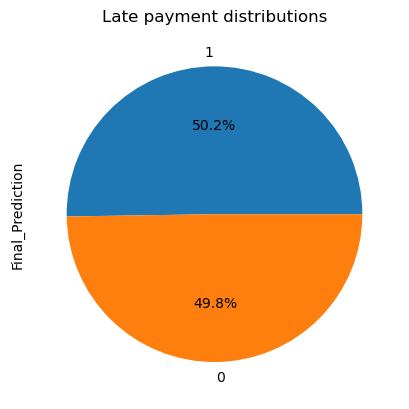

In [231]:
(open_new_df_age.Final_Prediction.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Late payment distributions")
plt.show()

#### From the pie chart, we can observe that 50.2% payments in the open invoice data with AGE value negative(indicating due date not crossed)

#### Summary of prediction on custmer_name

In [232]:
# Checking Customers with our target variable_delayed
Delay_payment = open_new_df_age.groupby(['Customer_Name'])['Final_Prediction'].sum()
Delay_payment = Delay_payment.to_frame()
Delay_payment = Delay_payment.sort_values(by ='Final_Prediction',ascending=False)

In [233]:
# Checking Customers for total invoice counts
Delay_payment_total = open_new_df_age.groupby(['Customer_Name'])['Final_Prediction'].count() 
# total payments by each customers
Delay_payment_total = Delay_payment_total.to_frame()
Delay_payment_total = Delay_payment_total.sort_values(by ='Final_Prediction',ascending=False)

In [234]:
# Merging both dataframes based on Customer_name
Merge_df=pd.merge(Delay_payment,Delay_payment_total,how='inner',on='Customer_Name')

In [235]:
# Renaming the columns
Merge_df.columns=["Delayed_Payment","Total_Payments"]

In [236]:
# Creating a column for delay percentage of each customers
Merge_df['Delay%']=np.round(Merge_df['Delayed_Payment']/Merge_df['Total_Payments']*100,2)

In [237]:
# Checking Merge_df 
Merge_df.sort_values('Total_Payments',ascending=False)

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
SEPH Corp,4432,8260,53.66
FITR Corp,1581,3454,45.77
PARF Corp,1031,1717,60.05
AREE Corp,754,1117,67.50
ALLI Corp,333,1042,31.96
...,...,...,...
BECC Corp,1,1,100.00
ATYA Corp,1,1,100.00
ARCO Corp,1,1,100.00


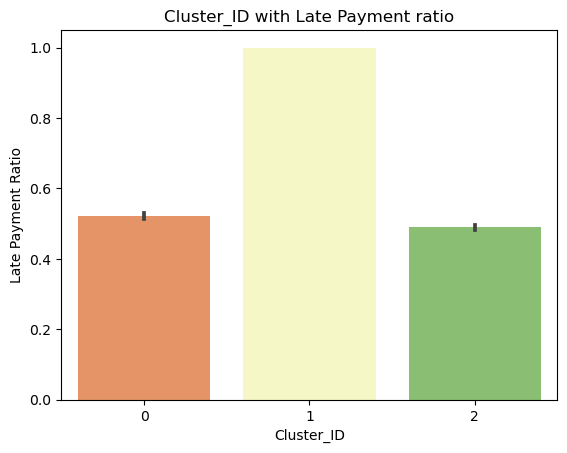

In [238]:
sns.barplot(data=open_new_df_age, x='cluster_id', y='Final_Prediction', estimator=np.mean, palette='RdYlGn')
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()


#### cluster ID 1 has significantly higher ratio of default than clusters 0 and 2

In [240]:
# top 10 customers with highest delay rates
Merge_df.sort_values(['Delay%','Total_Payments','Delayed_Payment'],ascending=[False,False,False]).head(10)

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
ALSU Corp,7,7,100.0
LVMH Corp,4,4,100.0
MILK Corp,3,3,100.0
MUOS Corp,3,3,100.0
MAYC Corp,3,3,100.0
ROVE Corp,3,3,100.0
AMAT Corp,3,3,100.0
TRAF Corp,3,3,100.0
CITY Corp,3,3,100.0


#### Recomendations

- Compared to debit note or invoice type invoice classes, credit note payments have the highest delay rate; therefore, firm policies regarding payment collection should be rigid with regard to these invoice classes.
- Stricter payment regulations may be applied to goods-type invoices since they had noticeably higher payment delay rates than non-goods-type invoices.
- It is advised to concentrate more on lesser value payments because they make up the majority of transactions and are also more likely to have late payments.The company can apply penalties depending on billing amount.
- Three categories—0, 1, and 2—which stand for medium, prolonged, and early payment durations, respectively—were created by clustering customer segments. Cluster 1 consumers should receive special attention because their delay rates were noticeably higher than those of early and middle days of payment.
- Final 10 customers should be focused more as their probability is highest. 